In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import os

In [2]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_csv.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 2].index)
df.head()

,Time,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,2020-09-16 15:01:48.579,0.394346,0.000089,0.0,38411.377778,0.022388,26840.822222,66951.888889,1.0,798.0,0.108064,12.0,6.736111,5.045532e+10,10.103324
1,2020-09-16 15:02:03.579,0.496422,0.000089,0.0,33405.155556,0.022388,31241.511111,82299.555556,1.0,1219.0,0.108776,12.0,6.736111,5.045532e+10,10.103324
2,2020-09-16 15:02:18.579,0.869166,0.000000,0.0,27397.688889,0.023329,39810.866667,100951.511111,1.0,1671.0,0.104263,12.0,6.291667,5.045532e+10,10.044898
3,2020-09-16 15:02:33.579,0.922940,0.000000,0.0,20571.022222,0.023329,44105.977778,101001.488889,1.0,2150.0,0.108428,12.0,6.291667,5.045532e+10,10.044898
4,2020-09-16 15:02:48.579,1.396847,0.000000,0.0,10922.666667,0.023186,54213.222222,108081.866667,1.0,2672.0,0.105191,12.0,6.911111,5.045532e+10,10.035144


In [3]:
df_t = pd.DataFrame()

In [4]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*df['totalcpu'])/100
df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']
df_t['replica'] = df['replica']
df_t.head()

,total_cpu_util,total_mem_util,responsetime,requests,replica
0,0.808333,509.766456,0.108064,798.0,1.0
1,0.808333,509.766456,0.108776,1219.0,1.0
2,0.755000,506.818566,0.104263,1671.0,1.0
3,0.755000,506.818566,0.108428,2150.0,1.0
4,0.829333,506.326431,0.105191,2672.0,1.0


In [5]:
df_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_cpu_util,2730.0,6.272606,3.768914,0.618667,3.532849,4.977667,9.145792,20.839186
total_mem_util,2730.0,624.385001,77.439971,459.115930,569.645875,614.428270,722.087117,739.513344
responsetime,2730.0,0.166957,0.165439,0.098982,0.105423,0.113183,0.152989,1.895442
requests,2730.0,78199.394139,51994.926435,446.000000,41091.500000,59314.500000,121421.250000,223185.000000
replica,2730.0,33.324176,22.273740,1.000000,1.000000,50.000000,50.000000,50.000000


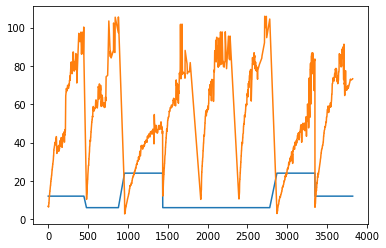

In [6]:
plt.plot(df["totalcpu"])
plt.plot(df["totalcpuUtilization"])

In [7]:
# set column indices for each column in df_t
column_indices = {name: i for i, name in enumerate(df_t.columns)}

# divide data in train, validate and test
n = len(df_t)
train_df = df_t[0:int(n*0.6)]
val_df = df_t[int(n*0.6):int(n*0.8)]
test_df = df_t[int(n*0.8):]

# get number of feature columns in df_t
num_features = df_t.shape[1]

In [8]:
train_df

,total_cpu_util,total_mem_util,responsetime,requests,replica
0,0.808333,509.766456,0.108064,798.0,1.0
1,0.808333,509.766456,0.108776,1219.0,1.0
2,0.755000,506.818566,0.104263,1671.0,1.0
3,0.755000,506.818566,0.108428,2150.0,1.0
4,0.829333,506.326431,0.105191,2672.0,1.0
...,...,...,...,...,...
2428,2.225333,537.309389,0.106478,21228.0,45.0
2429,2.308667,545.329766,0.103386,21755.0,45.0
2430,2.308667,545.329766,0.108986,22314.0,49.0
2431,2.409333,552.909005,0.109208,22910.0,49.0


In [9]:
train_mean = train_df.mean()
print(train_mean)
train_std = train_df.std()
print(train_std)

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
train_df

total_cpu_util        5.437301
total_mem_util      607.645729
responsetime          0.177266
requests          67598.842491
replica              33.894383
dtype: float64
total_cpu_util        3.154901
total_mem_util       79.404273
responsetime          0.180743
requests          48364.568752
replica              21.591344
dtype: float64


,total_cpu_util,total_mem_util,responsetime,requests,replica
0,-1.467231,-1.232670,-0.382876,-1.381194,-1.523499
1,-1.467231,-1.232670,-0.378937,-1.372489,-1.523499
2,-1.484136,-1.269795,-0.403907,-1.363143,-1.523499
3,-1.484136,-1.269795,-0.380864,-1.353239,-1.523499
4,-1.460574,-1.275993,-0.398775,-1.342446,-1.523499
...,...,...,...,...,...
2428,-1.018088,-0.885800,-0.391654,-0.958777,0.514355
2429,-0.991674,-0.784794,-0.408760,-0.947881,0.514355
2430,-0.991674,-0.784794,-0.377776,-0.936323,0.699614
2431,-0.959766,-0.689342,-0.376545,-0.924000,0.699614


### peek at the distribution of the features.

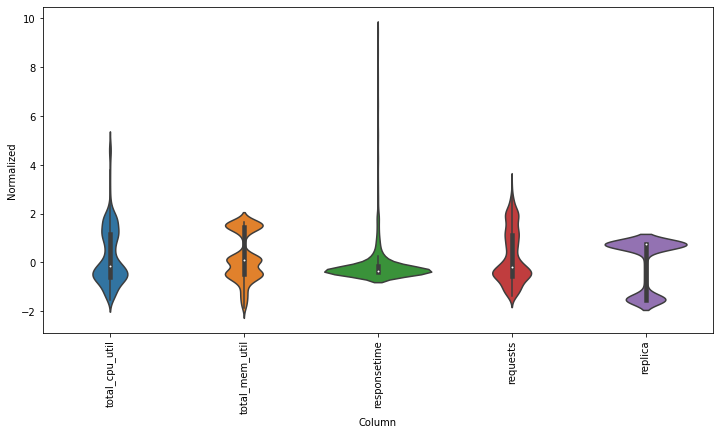

In [10]:
import seaborn as sns
df_std = (df_t - train_mean) / train_std
#print(df_std)
df_std = df_std.melt(var_name='Column', value_name='Normalized')
#print(df_std)
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_t.keys(), rotation=90)

In [11]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}
    print(self.label_columns)
    print(self.label_columns_indices)
    print(self.column_indices)

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [12]:
w1 = WindowGenerator(input_width=60, label_width=1, shift=60,
                     label_columns=['responsetime'])
w1

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}


Total window size: 120
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [119]
Label column name(s): ['responsetime']

In [13]:
w2 = WindowGenerator(input_width=300, label_width=1, shift=1,
                     label_columns=['responsetime'])
w2

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}


Total window size: 301
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [14]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [15]:
import tensorflow as tf

In [16]:

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[300:300+w2.total_window_size]),
                           np.array(train_df[600:600+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 301, 5)
Inputs shape: (3, 300, 5)
labels shape: (3, 1, 1)


In [17]:
w2.example = example_inputs, example_labels


In [18]:
def plot(self, model=None, plot_col='responsetime', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

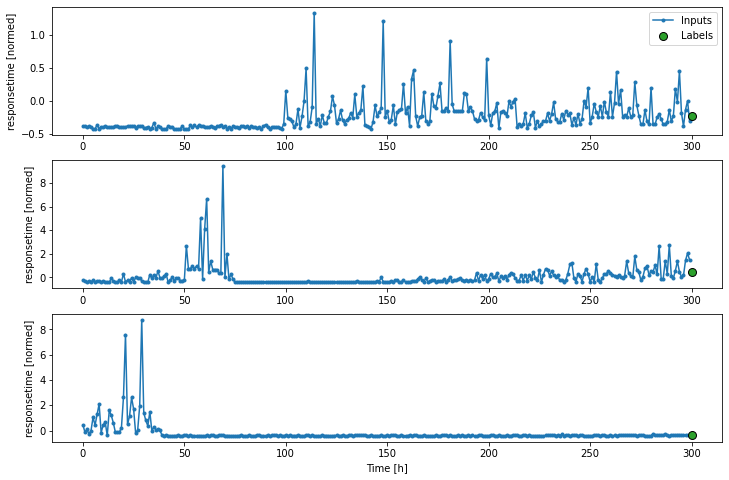

In [19]:
w2.plot()


In [20]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [21]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [22]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 300, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [23]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 300, 5)
Labels shape (batch, time, features): (32, 1, 1)


In [24]:
# Single step models

In [25]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['responsetime'])
single_step_window

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['responsetime']

In [26]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 5)
Labels shape (batch, time, features): (32, 1, 1)


In [27]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [28]:
baseline = Baseline(label_index=column_indices['responsetime'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


18/18 [==============================] - 0s 4ms/step - loss: 0.2461 - mean_absolute_error: 0.1773


In [29]:
wide_window = WindowGenerator(
    input_width=300, label_width=300, shift=1,
    label_columns=['responsetime'])

wide_window

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}


Total window size: 301
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [30]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


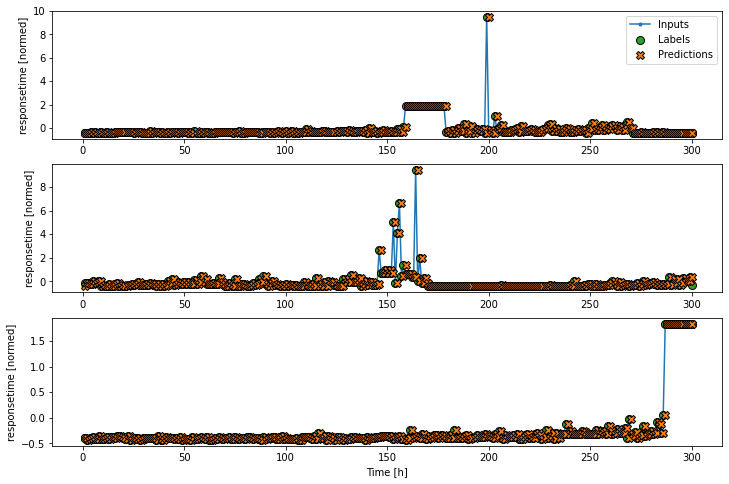

In [31]:
wide_window.plot(baseline)


In [32]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [33]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


In [34]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [35]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
52/52 [==============================] - 1s 11ms/step - loss: 1.3366 - mean_absolute_error: 0.6251 - val_loss: 0.5615 - val_mean_absolute_error: 0.5853
Epoch 2/20
52/52 [==============================] - 0s 5ms/step - loss: 1.2507 - mean_absolute_error: 0.5771 - val_loss: 0.5183 - val_mean_absolute_error: 0.5657
Epoch 3/20
52/52 [==============================] - 0s 6ms/step - loss: 1.1830 - mean_absolute_error: 0.5480 - val_loss: 0.4795 - val_mean_absolute_error: 0.5477
Epoch 4/20
52/52 [==============================] - 1s 10ms/step - loss: 1.1246 - mean_absolute_error: 0.5282 - val_loss: 0.4399 - val_mean_absolute_error: 0.5252
Epoch 5/20
52/52 [==============================] - 1s 12ms/step - loss: 1.0729 - mean_absolute_error: 0.5123 - val_loss: 0.4034 - val_mean_absolute_error: 0.5044
Epoch 6/20
52/52 [==============================] - 0s 7ms/step - loss: 1.0268 - mean_absolute_error: 0.4974 - val_loss: 0.3688 - val_mean_absolute_error: 0.4788
Epoch 7/20
52/52 [=======

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 300, 5)
Output shape: (32, 300, 1)


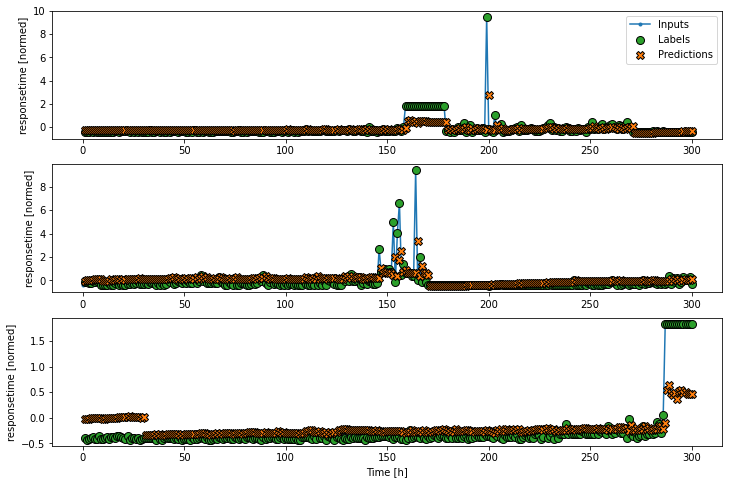

In [37]:
wide_window.plot(linear)

In [38]:
# weights per feature

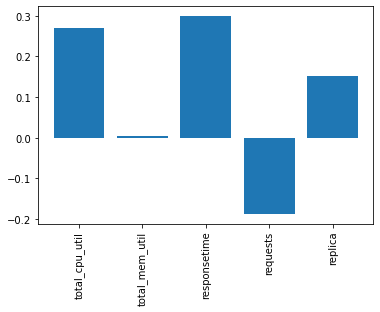

In [39]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [40]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
52/52 [==============================] - 0s 8ms/step - loss: 0.7903 - mean_absolute_error: 0.4000 - val_loss: 0.1619 - val_mean_absolute_error: 0.2345
Epoch 2/20
52/52 [==============================] - 0s 9ms/step - loss: 0.6816 - mean_absolute_error: 0.3555 - val_loss: 0.1638 - val_mean_absolute_error: 0.2357
Epoch 3/20
52/52 [==============================] - 0s 5ms/step - loss: 0.6650 - mean_absolute_error: 0.3446 - val_loss: 0.1604 - val_mean_absolute_error: 0.2061
Epoch 4/20
52/52 [==============================] - 0s 5ms/step - loss: 0.6523 - mean_absolute_error: 0.3378 - val_loss: 0.1579 - val_mean_absolute_error: 0.2142
Epoch 5/20
52/52 [==============================] - 0s 7ms/step - loss: 0.6433 - mean_absolute_error: 0.3492 - val_loss: 0.1524 - val_mean_absolute_error: 0.1922
Epoch 6/20
52/52 [==============================] - 1s 13ms/step - loss: 0.6335 - mean_absolute_error: 0.3308 - val_loss: 0.1579 - val_mean_absolute_error: 0.2144
Epoch 7/20
18/18 [=========

In [41]:
CONV_WIDTH = 300
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['responsetime'])

conv_window

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}


Total window size: 301
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

Text(0.5, 1.0, 'Given 3 values as input, predict 1 into the future.')

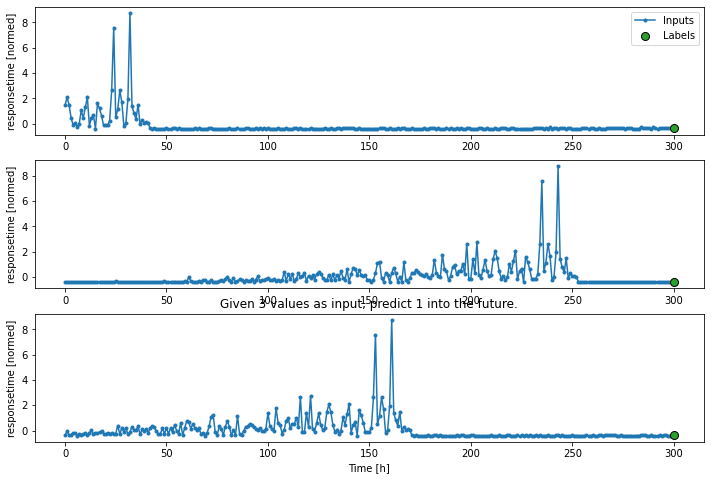

In [42]:
conv_window.plot()
plt.title("Given 3 values as input, predict 1 into the future.")

In [43]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [44]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 300, 5)
Output shape: (32, 1, 1)


In [45]:

import IPython
import IPython.display

In [46]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 2ms/step - loss: 0.0734 - mean_absolute_error: 0.2222


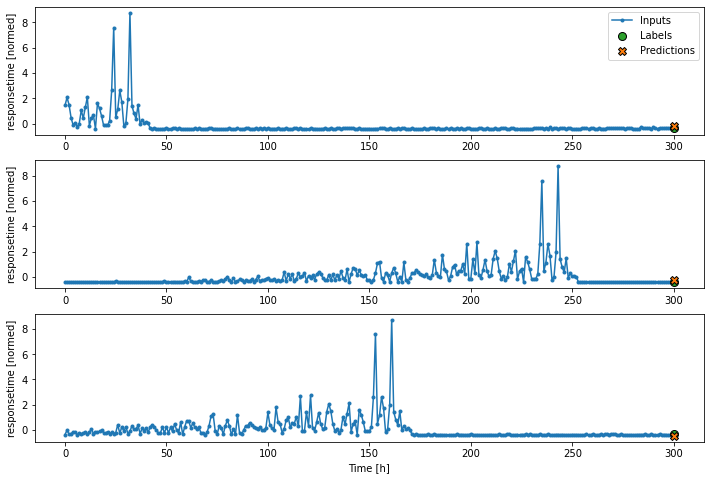

In [47]:
conv_window.plot(multi_step_dense)

In [48]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 300, 5)
Output shape: (32, 1, 1)


In [49]:
# cnn

In [50]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [51]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 300, 5)
Output shape: (32, 1, 1)


In [52]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 1ms/step - loss: 0.1131 - mean_absolute_error: 0.2669


In [53]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 300, 5)
Labels shape: (32, 300, 1)
Output shape: (32, 1, 1)


In [54]:
LABEL_WIDTH = 300
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['responsetime'])

wide_conv_window

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}


Total window size: 600
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [55]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 599, 5)
Labels shape: (32, 300, 1)
Output shape: (32, 300, 1)


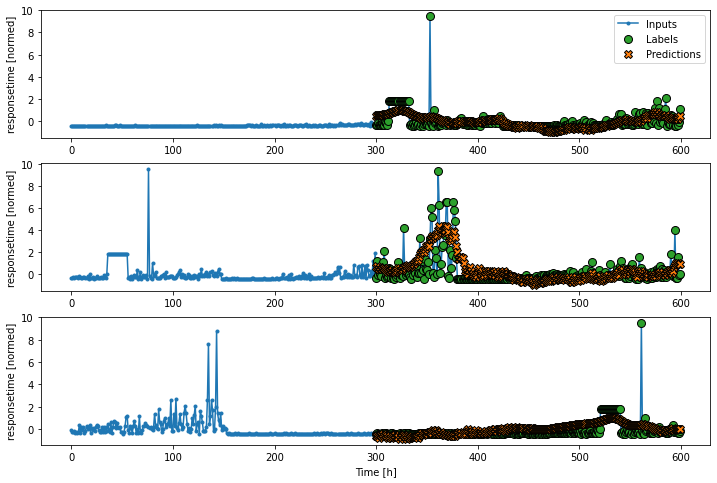

In [56]:
wide_conv_window.plot(conv_model)


In [57]:
# RNN

In [58]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [59]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 300, 5)
Output shape: (32, 300, 1)


In [60]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
42/42 [==============================] - 6s 155ms/step - loss: 0.8227 - mean_absolute_error: 0.4188 - val_loss: 0.1945 - val_mean_absolute_error: 0.2562
Epoch 2/20
42/42 [==============================] - 5s 125ms/step - loss: 0.6312 - mean_absolute_error: 0.3322 - val_loss: 0.1843 - val_mean_absolute_error: 0.2042
Epoch 3/20
42/42 [==============================] - 4s 102ms/step - loss: 0.5954 - mean_absolute_error: 0.3109 - val_loss: 0.1855 - val_mean_absolute_error: 0.1937
Epoch 4/20
8/8 [==============================] - 0s 30ms/step - loss: 0.1856 - mean_absolute_error: 0.1979


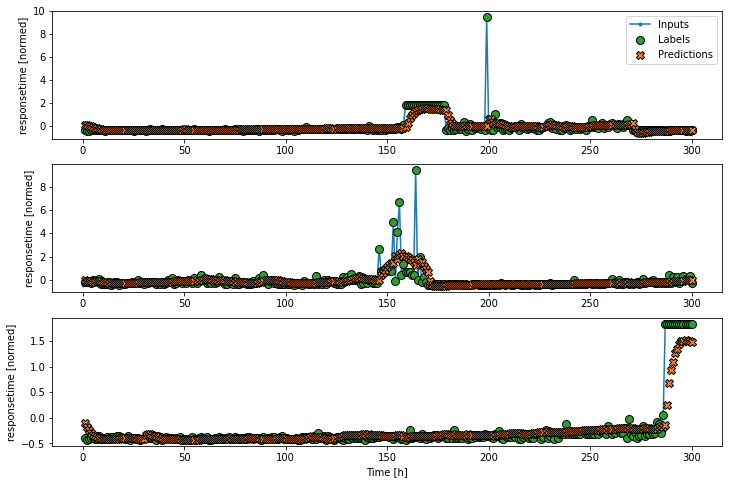

In [61]:
wide_window.plot(lstm_model)

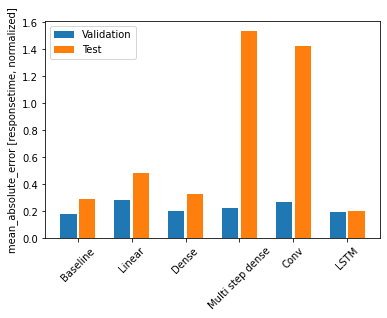

In [62]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [responsetime, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [63]:
# Multi-output models

In [64]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=['responsetime'])
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.

wide_window = WindowGenerator(
    input_width=300, label_width=300, shift=1, label_columns=['responsetime'])

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}
['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}
Inputs shape (batch, time, features): (32, 300, 5)
Labels shape (batch, time, features): (32, 300, 1)


In [65]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [66]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

8/8 [==============================] - 0s 1ms/step - loss: 1.0742 - mean_absolute_error: 0.7781


In [67]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [68]:
history = compile_and_fit(dense, single_step_window)

#IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
52/52 [==============================] - 1s 12ms/step - loss: 0.8578 - mean_absolute_error: 0.4387 - val_loss: 0.1579 - val_mean_absolute_error: 0.2269
Epoch 2/20
52/52 [==============================] - 1s 10ms/step - loss: 0.7029 - mean_absolute_error: 0.3644 - val_loss: 0.1611 - val_mean_absolute_error: 0.2078
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 0.1654 - mean_absolute_error: 0.2120


In [69]:
%%time
wide_window = WindowGenerator(
    input_width=300, label_width=300, shift=1, label_columns=['responsetime'])

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}
Epoch 1/20
42/42 [==============================] - 6s 135ms/step - loss: 0.8156 - mean_absolute_error: 0.4261 - val_loss: 0.2020 - val_mean_absolute_error: 0.2655
Epoch 2/20
42/42 [==============================] - 5s 120ms/step - loss: 0.6479 - mean_absolute_error: 0.3369 - val_loss: 0.1908 - val_mean_absolute_error: 0.2181
Epoch 3/20
42/42 [==============================] - 6s 136ms/step - loss: 0.6032 - mean_absolute_error: 0.3119 - val_loss: 0.1886 - val_mean_absolute_error: 0.2039
Epoch 4/20
42/42 [==============================] - 5s 123ms/step - loss: 0.5720 - mean_absolute_error: 0.2975 - val_loss: 0.1865 - val_mean_absolute_error: 0.2045
Epoch 5/20
42/42 [==============================] - 5s 112ms/step - loss: 0.5459 - mean_absolute_error: 0.2924 - val_loss: 0.2215 - val_mean_absolute_error: 0.2395
Epoch 6/20
8/8 [==============================] - 0s

In [70]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [71]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

8/8 [==============================] - 0s 21ms/step - loss: 0.2871 - mean_absolute_error: 0.2641

CPU times: user 1min 57s, sys: 18 s, total: 2min 15s
Wall time: 1min 22s


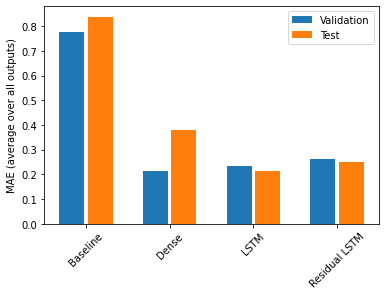

In [72]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [73]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.8377
Dense          : 0.3789
LSTM           : 0.2148
Residual LSTM  : 0.2510


['responsetime']
{'responsetime': 0}
{'total_cpu_util': 0, 'total_mem_util': 1, 'responsetime': 2, 'requests': 3, 'replica': 4}


Total window size: 600
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

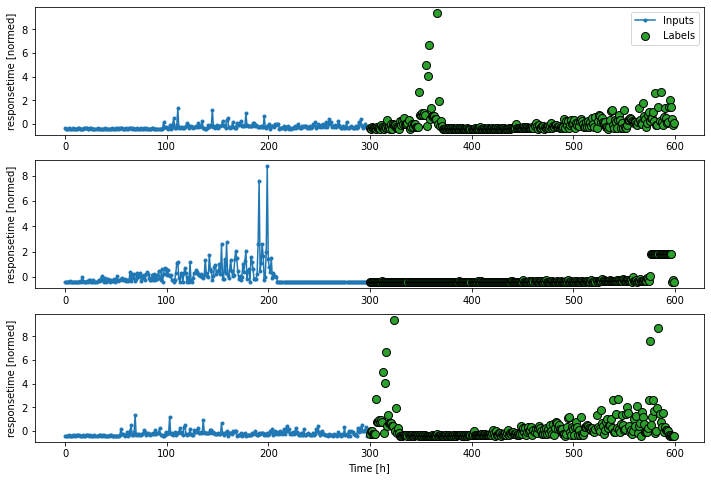

In [74]:
OUT_STEPS = 300
multi_window = WindowGenerator(input_width=300,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, label_columns=['responsetime'])

multi_window.plot()
multi_window

In [75]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/keras/utils/generic_utils.py:581: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

In [ ]:
# Single-shot models

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.train, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
#Advanced: Autoregressive model

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)


In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)


In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()


In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

In [ ]:
# Modeling:
# Using sklearn package to model data :
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy
numpy.random.seed(7)
classifiers = [
    #svm.SVR(),
    #linear_model.SGDRegressor(),
    #linear_model.BayesianRidge(),
    #linear_model.LassoLars(),
    #linear_model.ARDRegression(), # parameters to avoid negative values 
    #linear_model.PassiveAggressiveRegressor(),
    linear_model.LinearRegression()
]
X = df[['cpu', 'mem', 'replica', 'requests', 'totalcpu', 'totalmemory','totalcpuUtilization', 'totalmemoryUtilization']]
#print(X.tail())
X_normalized = preprocessing.normalize(X, norm='l2')
#print(X_normalized)
train_x, test_x, train_y, test_y = np.asarray(train_test_split(X, df['responsetime'], test_size=0.1))
for item in classifiers:
    print(item)
    regr = item
    #train_x = preprocessing.normalize(train_x, norm='l2')
    regr.fit(train_x,train_y)
    #test_x = preprocessing.normalize(test_x, norm='l2')
    #Now let’s do prediction of data:
    Y_pred = regr.predict(test_x)
    #print(Y_pred)
    # Check accuracy:
    from sklearn.metrics import r2_score
    R = r2_score(test_y , Y_pred)
    print ('R² :',R)
    plt.scatter(range(0,len(test_y)),test_y)
    plt.scatter(range(0,len(Y_pred)),Y_pred)
    plt.show()

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[300:300+w2.total_window_size]),
                           np.array(train_df[600:600+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

In [ ]:
#test_x = np.array(test[X])
#test_y = np.array(test[Y])
# The coefficients:
#print("coefficients : ",regr.coef_) #Slope
#print("Intercept : ",regr.intercept_) #Intercept
#coeff_data = pd.DataFrame(regr.coef_ , X , columns=['Coefficients'])
#coeff_data

In [ ]:
#Now let’s do prediction of data:
#Y_pred = regr.predict(test_x)
# Check accuracy:
#from sklearn.metrics import r2_score
#R = r2_score(test_y , Y_pred)
#print ('R² :',R)
#plt.scatter(range(0,len(test_y)),test_y)
#plt.scatter(range(0,len(Y_pred)),Y_pred)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_csv.csv"))
df = df.drop(df[df.responsetime > 3].index)
X = df[['cpu', 'mem', 'replica', 'requests', 'totalcpu', 'totalmemory', 'totalcpuUtilization', 'totalmemoryUtilization']]
y = df[['responsetime']]
X_normalized = preprocessing.normalize(X, norm='l2')
train_x, test_x, train_y, test_y = np.asarray(train_test_split(X_normalized, y, test_size=0.33))
model = Sequential()
model.add(Dense(20, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y,validation_data=(test_x,test_y), epochs=150, batch_size=50)

In [ ]:
_, accuracy = model.evaluate(train_x, train_y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Trying to normalize
from sklearn import preprocessing

X = df[['cpu', 'mem', 'replica','requests','totalcpu']]
X_normalized = preprocessing.normalize(X, norm='l2')
y = df[['responsetime']]
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_normalized, y, epochs=150, batch_size=450)

In [ ]:
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# tensorflow 2.0

cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
dftrain = pd.read_csv(os.path.join(output_dir, "combined_csv.csv"))
dfeval = pd.read_csv(os.path.join(output_dir, "figlet1599862779.106539_1599870002.091422.csv"))
dftrain = dftrain.drop(dftrain[dftrain.responsetime > 3].index)
dfeval = dfeval.drop(dfeval[dfeval.responsetime > 3].index)
y_train = dftrain.pop('responsetime')
y_eval = dfeval.pop('responsetime')
dftrain.head()

In [ ]:
NUMERIC_COLUMNS = ['replica', 'requests', 'totalcpu', 'totalmemory']

In [ ]:
feature_columns = []
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(100)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)
#print(train_input_fn)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

#clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model